In [1]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
sns.set(style="whitegrid", color_codes=True)

## part 2: data

In [2]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df1 = pd.read_csv('/Users/monasayehban/Documents/Introduction to BIg DATA/ASS1/assignments/data/twitter_sample.csv', sep='|', names=colnames)

df1.tail(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [5]:
print (df1.columns)
print(df1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns)
# we drop None here

Index(['id', 'postedTime', 'body', 'None', '['twitter_entiteis:urls:url']',
       '['None']', '['actor:languages_list-items']', 'gnip:language:value',
       'twitter_lang', '[u'geo:coordinates_list-items']', 'geo:type', 'None.1',
       'None.2', 'None.3', 'None.4', 'actor:utcOffset', 'None.5', 'None.6',
       'None.7', 'None.8', 'None.9', 'None.10', 'None.11', 'None.12',
       'None.13', 'actor:displayName', 'actor:preferredUsername', 'actor:id',
       'gnip:klout_score', 'actor:followersCount', 'actor:friendsCount',
       'actor:listedCount', 'actor:statusesCount', 'Tweet', 'None.14',
       'None.15', 'None.16'],
      dtype='object')
Index(['id', 'postedTime', 'body', 'None', '['twitter_entiteis:urls:url']',
       '['None']', '['actor:languages_list-items']', 'gnip:language:value',
       'twitter_lang', '[u'geo:coordinates_list-items']', 'geo:type', 'None.1',
       'None.2', 'None.3', 'None.4', 'actor:utcOffset', 'actor:displayName',
       'actor:preferredUsername', 'acto

In [6]:
df1.tail(6)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


**Slicing & Combining **

In [7]:
df1[df1.twitter_lang == 'pt'].head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,None,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,"['[-120.364921, 47.396859]', '[-120.364921, 47...",Polygon,"Wenatchee, WA",US,-28800,"Wenatchee, Washington",None,None,None,None,None,None,None,None,Mailari ♥,MailariMunoz,30740676,42,247,64,1,2438,Tweet,None,None,None
21,"tag:search.twitter.com,2005:351835317956902912",2013-07-01T22:50:51.000Z,és uma merda,None,None,None,['pt'],en,pt,None,None,"['[-8.7583395, 40.5284833]', '[-8.7583395, 40....",Polygon,"Aveiro, Aveiro",PT,None,Aveiro,None,None,None,None,None,None,None,None,Mafalda Azevedo,MafaldaAzevedo9,1316723420,43,137,89,0,4047,Tweet,None,None,None
27,"tag:search.twitter.com,2005:351835318619607043",2013-07-01T22:50:51.000Z,"David Luiz, me come",None,None,None,['pt'],en,pt,None,None,"['[-43.795449, -23.083019999999998]', '[-43.79...",Polygon,"Rio de Janeiro, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Buba Aguiar,Buba_polvilho,88753650,38,231,352,0,15233,Tweet,None,None,None
28,"tag:search.twitter.com,2005:351835317864628224",2013-07-01T22:50:51.000Z,O meu ninfa girava e eu nem Creditava q aquilo...,None,None,None,['pt'],en,pt,"[-6.07340332, -49.89367576]",Point,"['[-51.198932, -6.623769999999999]', '[-51.198...",Polygon,"Parauapebas, Pará",BR,-10800,:),None,None,None,None,None,None,None,None,romullo araujo ,romulloar7,220404906,47,421,345,0,15986,Tweet,None,None,None
44,"tag:search.twitter.com,2005:351835319403950080",2013-07-01T22:50:51.000Z,"Toquei nela sem querer ela gritou, quem você p...",None,None,None,['pt'],en,pt,None,None,"['[-46.826038999999994, -24.008813999999997]',...",Polygon,"São Paulo, São Paulo",BR,-10800,None,None,None,None,None,None,None,None,None,Doctor Muringa [ODS],Alanpreto_,225935697,44,789,150,0,10134,Tweet,None,None,None


In [8]:
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [9]:
df2.dtypes

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [10]:
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [11]:
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)
df2 = df2.astype(float)
df2.dtypes

/Users/monasayehban/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [12]:
df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:followersCount']
df2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


** grouping**

In [13]:
df1.head()
pop_df = df1[df1["actor:followersCount"] >= 100]

In [14]:
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')
lang_gb.head(2)

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35,178,129,2028
1,es,32,144,215,4071
3,es,50,438,174,17636
5,tr,41,226,346,7759
6,pt,42,247,64,2438
8,en,38,380,860,3116
9,en,41,160,135,4170
16,und,53,1179,628,20141
18,he,37,151,284,641
20,it,46,1999,293,60236


## part 3: plotting

In [15]:
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1796.147059,582.735294,16364.352941
es,1359.285714,441.142857,8953.357143
fr,116.000000,122.000000,3174.000000
he,151.000000,284.000000,641.000000


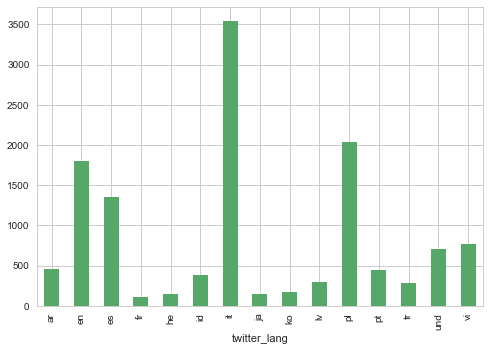

In [16]:
lang_gb_mean['actor:followersCount'].plot(kind='bar', color='g')

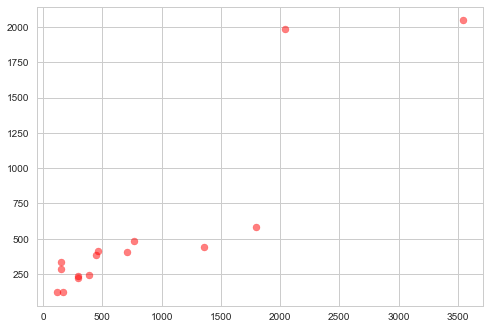

In [17]:
plt.scatter(x=lang_gb_mean['actor:followersCount'],\
            y=lang_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='red',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b857da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc28828>]], dtype=object)

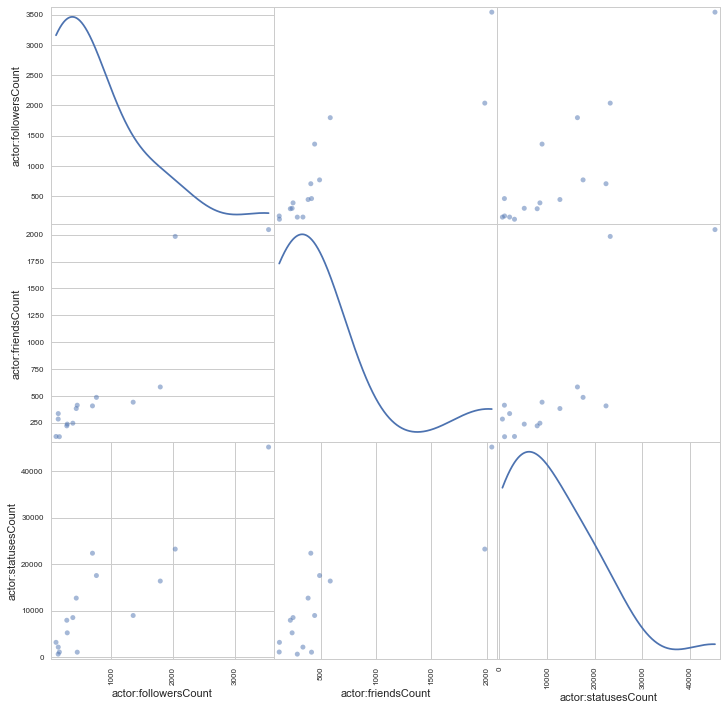

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(lang_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

In [19]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,0.428524,1.191333,-0.458207,-1.858608
2000-01-02,1.452977,1.884635,0.330291,-1.468828
2000-01-03,1.734842,4.760591,-0.145992,0.211428
2000-01-04,1.339333,4.447491,-1.234365,1.569470
2000-01-05,2.337328,2.878486,-0.778886,0.352679


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7bfeb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c8feba8>]], dtype=object)

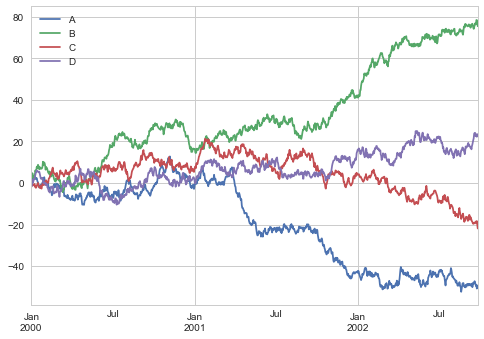

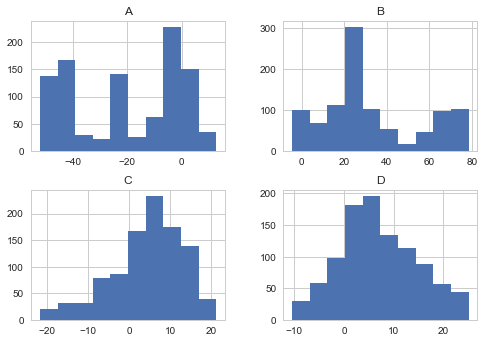

In [20]:
df.plot()
df.hist()

**Visualizing the distribution of a datase **

**Plotting univariate distributions**

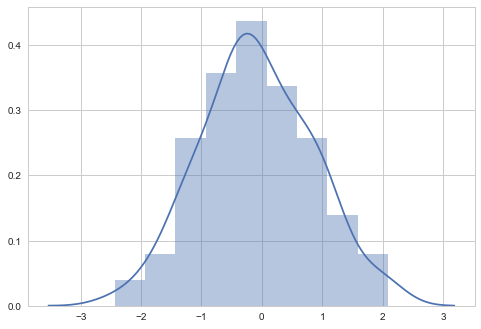

In [21]:
x = np.random.normal(size=100)
sns.distplot(x);

**Histograms**

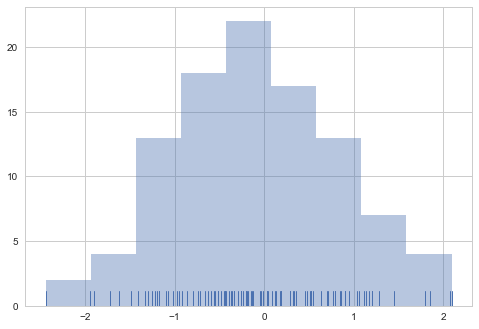

In [22]:
sns.distplot(x, kde=False, rug=True);

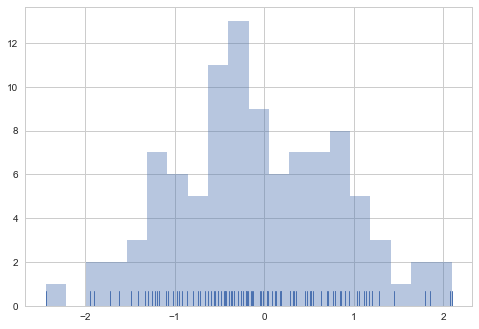

In [23]:
sns.distplot(x, bins=20, kde=False, rug=True);

**Plotting bivariate distributions**

In [24]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

**Scatterplots**

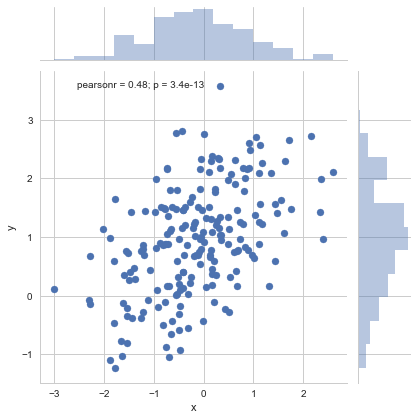

In [25]:
sns.jointplot(x="x", y="y", data=df);

**Hexbin plots**

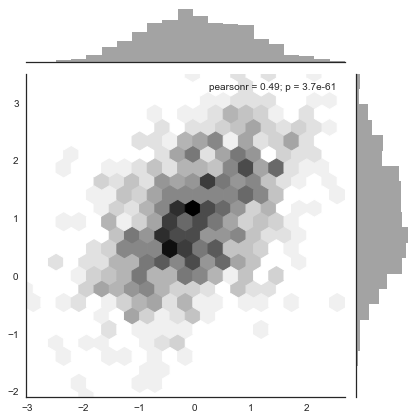

In [26]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

**Kernel density estimation**

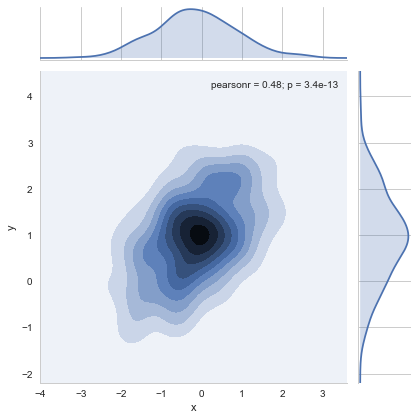

In [27]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

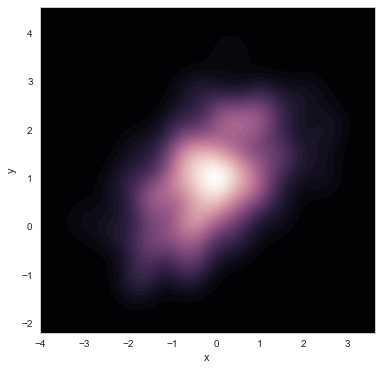

In [28]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

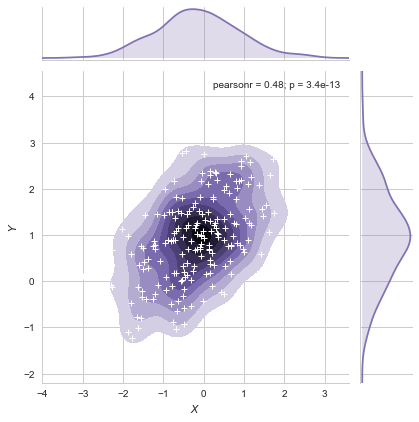

In [29]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing pairwise relationships in a dataset

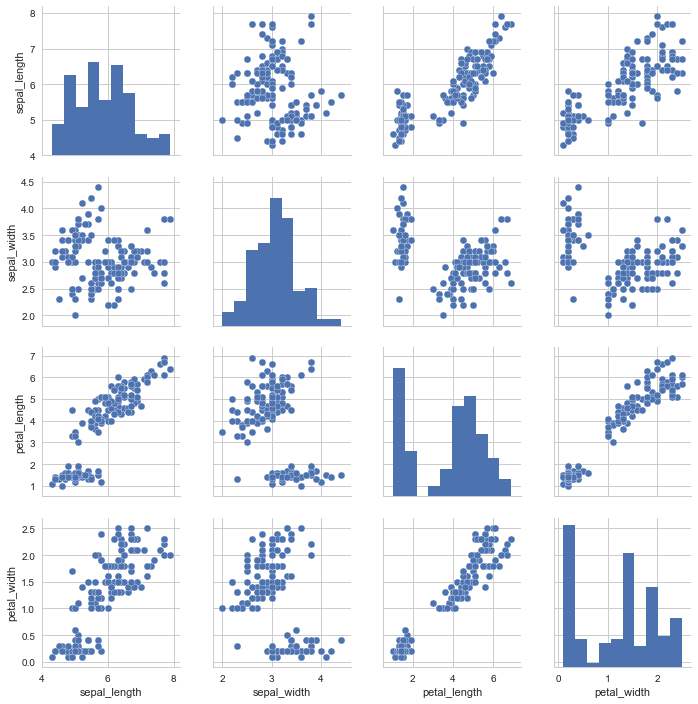

In [30]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

/Users/monasayehban/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


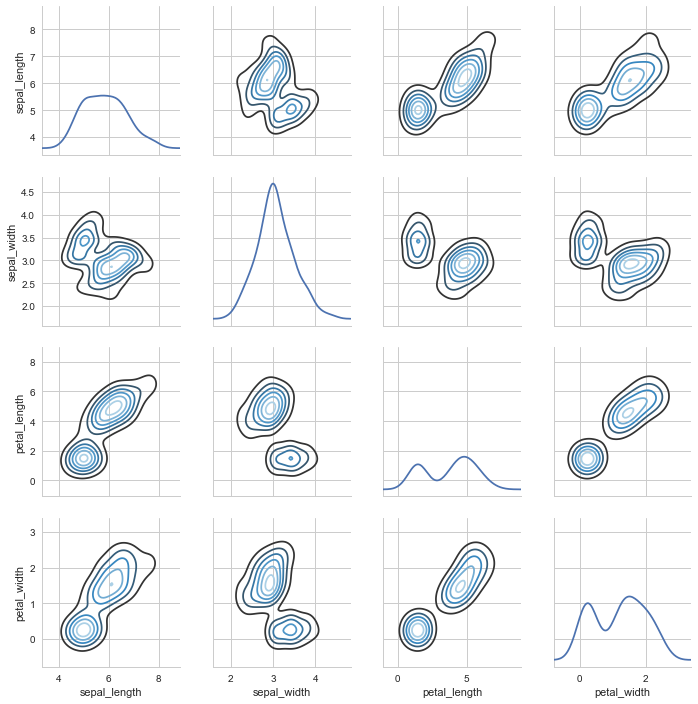

In [31]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## Visualizing linear relationships

In [32]:
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")

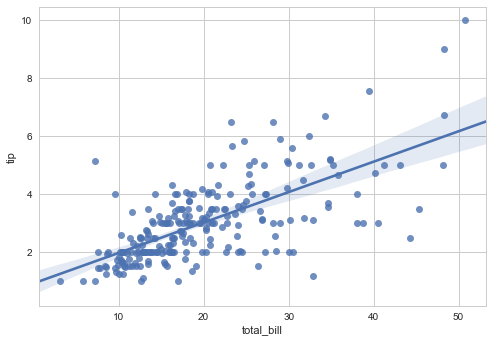

In [33]:
sns.regplot(x="total_bill", y="tip", data=tips)

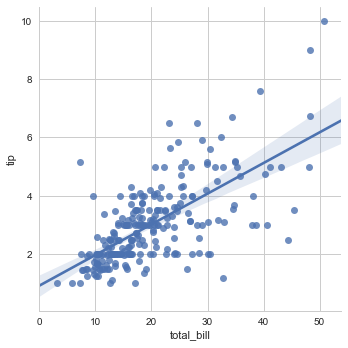

In [34]:
sns.lmplot(x="total_bill", y="tip", data=tips);

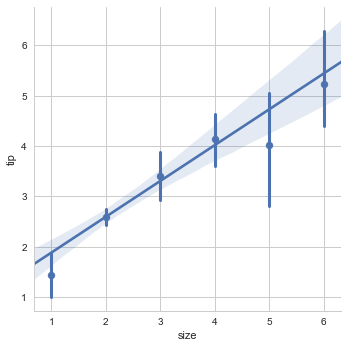

In [35]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

##  Plotting with categorical data

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [37]:
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

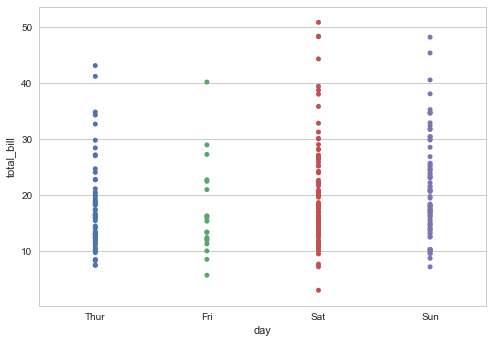

In [38]:
sns.stripplot(x="day", y="total_bill", data=tips);

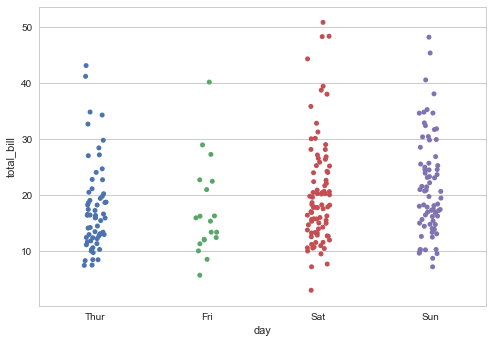

In [39]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

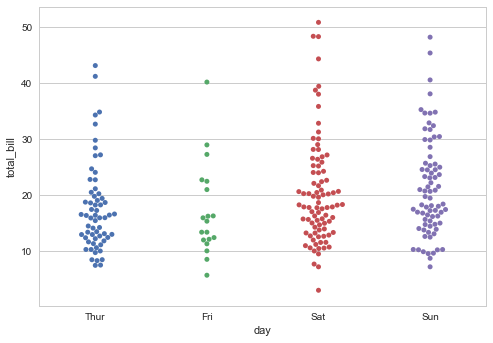

In [40]:
sns.swarmplot(x="day", y="total_bill", data=tips);

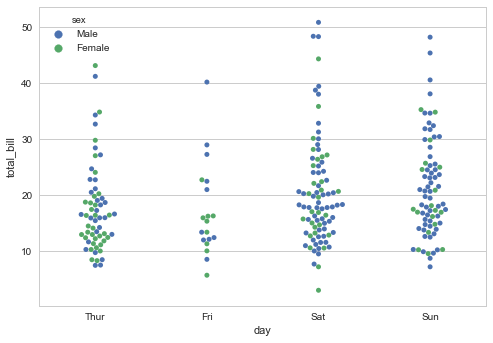

In [41]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

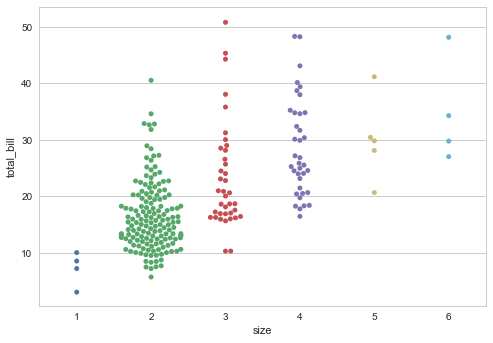

In [42]:
sns.swarmplot(x="size", y="total_bill", data=tips);

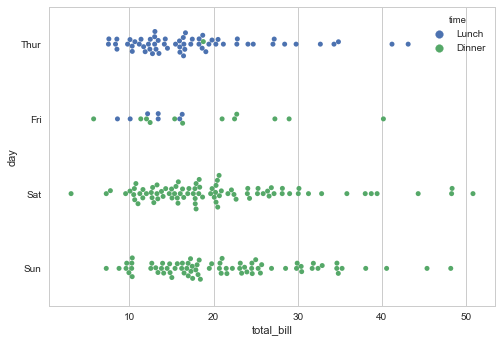

In [43]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

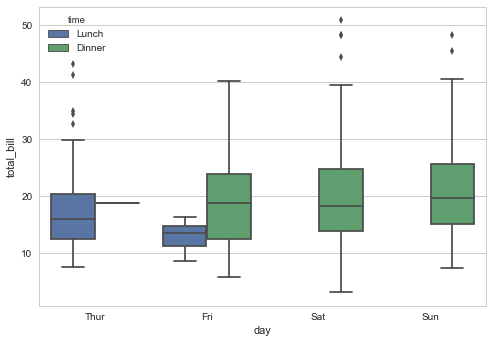

In [44]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

## Statistical estimation within categories

.Bar plots(countplot)
.Point plots
.Plotting "wide-form" data
.Multi-panel categorical plots 

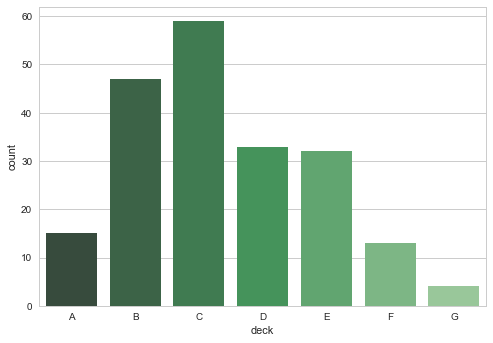

In [45]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

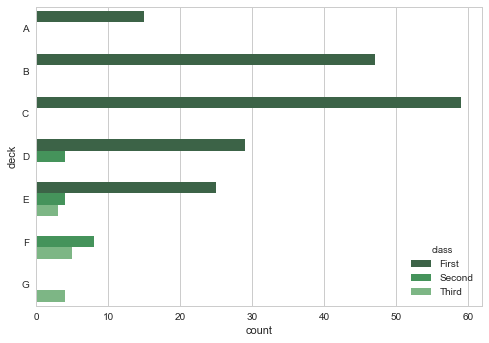

In [46]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

** Point plot **

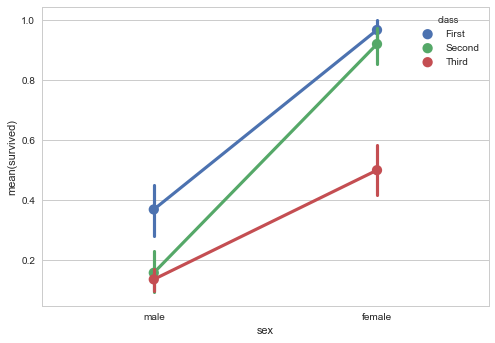

In [47]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

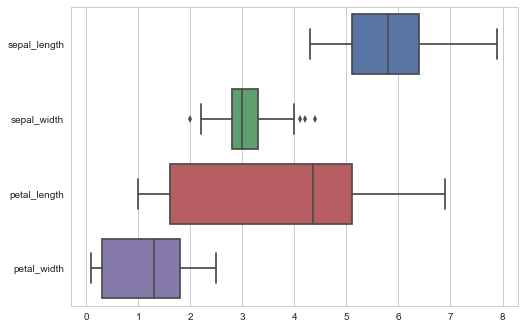

In [48]:
sns.boxplot(data=iris, orient="h")

** multi-panel categorical plots**

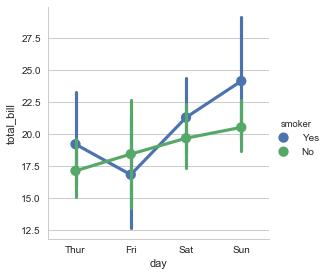

In [49]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);